In [1]:
import os
import time
import argparse
import pandas as pd
from sklearn.manifold import TSNE
from fragt2vec.utility import SELECTED_MD, get_format_time, find_nearest_neighbor, draw_multiple_mol

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
def reduce_by_tsne(x):
    t0 = time.time()
    tsne = TSNE(n_components=2, n_jobs=4, learning_rate=200,
                n_iter=2000, random_state=42, init='pca', verbose=1)
    X_reduced_tsne = tsne.fit_transform(x)
    # X_reduced_tsne = tsne.fit(x)
    print(X_reduced_tsne.shape)
    # np.save('X_reduced_tsne_pca_first', X_reduced_tsne2)
    t1 = time.time()
    print("t-SNE took {:.1f}s.".format(t1 - t0))
    return X_reduced_tsne


def show_each_md(x_reduced, frag_info, file_path=''):
    """
    reduced_x: 2 dimensions x with fragment as index, a dataframe
    frag_info: the number of each MD with fragemnt as index, a dataframe
    """
    # model = model_name
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax = ax.flatten()
    # print(x_reduced.head(2))
    # print(frag_info.head(2))
    intersect_index = set(x_reduced.index.to_list()) & set(frag_info.index.to_list())
    x_reduced = x_reduced.loc[intersect_index, :].copy()  # alignment
    frag_info = frag_info.loc[intersect_index, :].copy()
    # reduced_x = reduced_x.loc[frag_info.index, :].copy()
    # parallel_frag_info = parallel_frag_info.loc[:, selected_md].copy()
    for i,md in enumerate(frag_info.columns.to_list()):
        # current_labels = parallel_frag_info.iloc[:, i]
        current_labels = frag_info.iloc[:, i]
        unique_labels = sorted(current_labels.unique())
        n_labels = len(unique_labels)
        # print(n_labels)
        cc = sns.color_palette('Blues', n_labels)
        for j,label in enumerate(unique_labels):
            current_nodes = (current_labels == label)
            ax[i].scatter(x_reduced.loc[current_nodes, 0], x_reduced.loc[current_nodes, 1],
                          c=colors.rgb2hex(cc[j]), vmin=0, vmax=10, s=10, label=str(label))
        ax[i].set_title(md, fontsize=12)
        ax[i].legend()
    plt.tight_layout()
    plt.savefig(file_path, bbox_inches='tight', transparent=True)
    plt.close()


In [3]:
root_dir = '../big_data/05_model_Tandem2vec/'
need_plot_md = ['nN', 'nS', 'nBondsD', 'naRing']

In [4]:
frag2info = pd.read_csv(os.path.join(root_dir, 'frag_smiles2md.csv'), index_col=0)
frag2info = frag2info.loc[:, need_plot_md]
frag2info.head(2)

,nN,nS,nBondsD,naRing
fragment,,,,
CC,0,0,0,0
C,0,0,0,0


In [5]:
minn = 1
maxn = 2

frag_id2vec_file = 'frag_id2vec_minn_{}_maxn_{}.csv'.format(minn, maxn)
frag2vec_fp = os.path.join(root_dir, frag_id2vec_file)

In [6]:
frag2vec = pd.read_csv(frag2vec_fp, index_col='fragment')
x_reduced = reduce_by_tsne(frag2vec)
x_reduced = pd.DataFrame(data=x_reduced, index=frag2vec.index)
save_fig_path = os.path.join('./chapter3_figure/', 't-SNE_vis_ws_{}_minn_{}_maxn_{}.pdf'.format(4, minn, maxn))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15319 samples in 0.295s...
[t-SNE] Computed neighbors for 15319 samples in 1.949s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15319
[t-SNE] Computed conditional probabilities for sample 2000 / 15319
[t-SNE] Computed conditional probabilities for sample 3000 / 15319
[t-SNE] Computed conditional probabilities for sample 4000 / 15319
[t-SNE] Computed conditional probabilities for sample 5000 / 15319
[t-SNE] Computed conditional probabilities for sample 6000 / 15319
[t-SNE] Computed conditional probabilities for sample 7000 / 15319
[t-SNE] Computed conditional probabilities for sample 8000 / 15319
[t-SNE] Computed conditional probabilities for sample 9000 / 15319
[t-SNE] Computed conditional probabilities for sample 10000 / 15319
[t-SNE] Computed conditional probabilities for sample 11000 / 15319
[t-SNE] Computed conditional probabilities for sample 12000 / 15319
[t-SNE] Computed conditional probabilities for sam

#### fig. 3-2, 3-3

In [8]:
print('  >Start to plot t-SNE vis of fragment vector...')
show_each_md(x_reduced=x_reduced, frag_info=frag2info,
             file_path=save_fig_path)

  >Start to plot t-SNE vis of fragment vector...


#### fragment similarity

In [68]:
q_frags = ["C1=COCO1" ,"C1=CCNN=C1" ,"C1=CCC1" ,"OBr" ,"C1=CN=N[SH]=C1" ,"S=S" ,"C1#CNCC1" ,"C1#CCCC1"]

In [69]:
q_frag2vec = frag2vec.loc[q_frags, :].copy()

In [70]:
nn = find_nearest_neighbor(training_mol_vec_fp=frag2vec_fp, query_mol_vec_df=q_frag2vec, top_n=4)

current line: 0
current line: 10000


In [71]:
nn

[{'C1=COCO1': 'C1=COCO1: 0.9999999999999999; C1=COSOC1: 0.9997702592529877; C1=NC2=C3CN1C1CCC(COPOPOCC4CCC(O4)N2C=N3)C1: 0.9997203342455347; C1=NC2=C3CN1C1C=C(CC1)COPOPOCC1CCC(O1)N2C=N3: 0.9996419350440197'},
 {'C1=CCNN=C1': 'C1=CCNN=C1: 1.0; C1=CNN=CC1: 0.9999996376032001; C1=CNCN=CC1: 0.9998148060208029; C1=CCNCN=C1: 0.9998147558274711'},
 {'C1=CCC1': 'C1=CCC1: 0.9999999999999997; C1=CC2CC(C1)C1CCCC2CN1: 0.9995970196848243; C1=CCNCCCCC1: 0.9995201197170418; C1=CCCCNCCC1: 0.9995172834121293'},
 {'OBr': 'OBr: 0.9999999999999998; OP: 0.9996080090898287; PP: 0.9993969531986444; OI: 0.9993603466867693'},
 {'C1=CN=N[SH]=C1': 'C1=CN=N[SH]=C1: 1.0000000000000002; C1=CNN=CN=C1: 0.9997473046236447; C1=CN=CNN=C1: 0.9997468243033162; C1=CN=[SH]N=C1: 0.9997203447695517'},
 {'S=S': 'S=S: 0.9999999999999999; C1CCCCN2CCC3CCC(CCC1)CC3C2: 0.9976206576703536; C1#CCCCC=CCC1: 0.9974200994842681; C1CC2CCC3CC24CC1CC1CC2CC3CC2(C1)C4: 0.9974117224471951'},
 {'C1#CNCC1': 'C1#CNCC1: 0.9999999999999998; C1CNCCC

In [72]:
# smiles_list = [i.split(": ")[0] for i in nn[0][q_frags[0]].split('; ')]

0 ['C1=COCO1', 'C1=COSOC1', 'C1=NC2=C3CN1C1CCC(COPOPOCC4CCC(O4)N2C=N3)C1', 'C1=NC2=C3CN1C1C=C(CC1)COPOPOCC1CCC(O1)N2C=N3']
1 ['C1=COCO1', 'C1=COSOC1', 'C1=NC2=C3CN1C1CCC(COPOPOCC4CCC(O4)N2C=N3)C1', 'C1=NC2=C3CN1C1C=C(CC1)COPOPOCC1CCC(O1)N2C=N3', 'C1=CCNN=C1', 'C1=CNN=CC1', 'C1=CNCN=CC1', 'C1=CCNCN=C1']
2 ['C1=COCO1', 'C1=COSOC1', 'C1=NC2=C3CN1C1CCC(COPOPOCC4CCC(O4)N2C=N3)C1', 'C1=NC2=C3CN1C1C=C(CC1)COPOPOCC1CCC(O1)N2C=N3', 'C1=CCNN=C1', 'C1=CNN=CC1', 'C1=CNCN=CC1', 'C1=CCNCN=C1', 'C1=CCC1', 'C1=CC2CC(C1)C1CCCC2CN1', 'C1=CCNCCCCC1', 'C1=CCCCNCCC1']
3 ['C1=COCO1', 'C1=COSOC1', 'C1=NC2=C3CN1C1CCC(COPOPOCC4CCC(O4)N2C=N3)C1', 'C1=NC2=C3CN1C1C=C(CC1)COPOPOCC1CCC(O1)N2C=N3', 'C1=CCNN=C1', 'C1=CNN=CC1', 'C1=CNCN=CC1', 'C1=CCNCN=C1', 'C1=CCC1', 'C1=CC2CC(C1)C1CCCC2CN1', 'C1=CCNCCCCC1', 'C1=CCCCNCCC1', 'OBr', 'OP', 'PP', 'OI']
4 ['C1=COCO1', 'C1=COSOC1', 'C1=NC2=C3CN1C1CCC(COPOPOCC4CCC(O4)N2C=N3)C1', 'C1=NC2=C3CN1C1C=C(CC1)COPOPOCC1CCC(O1)N2C=N3', 'C1=CCNN=C1', 'C1=CNN=CC1', 'C1=CNCN=CC1', 'C1=C

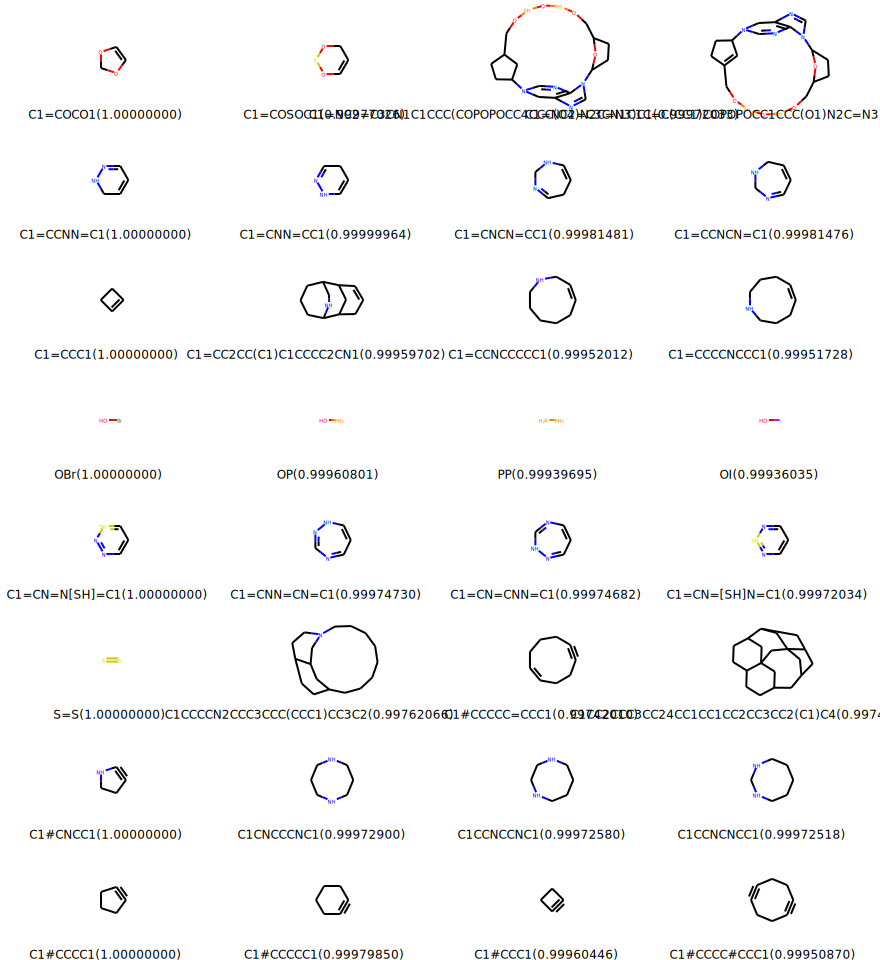

In [73]:
smiles_list = []
dis = []
legends = []
for inx in range(len(q_frags)):
    smiles_list += [i.split(": ")[0] for i in nn[inx][q_frags[inx]].split('; ')]
    dis += [str('{:.8f}').format(float(i.split(": ")[1])) for i in nn[inx][q_frags[inx]].split('; ')]
    # print(dis)
    print(inx, smiles_list)
legends += ['{}({})'.format(smiles_list[i],dis[i]) for i in range(len(smiles_list))]
draw_multiple_mol(smiles_list=smiles_list, mols_per_row=4, 
                  file_path='./chapter3_figure/{}_.svg'.format(inx), legends=legends)

In [35]:
import rdkit
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
from IPython.display import SVG

In [23]:
rdkit.__version__

'2019.03.3'

In [24]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw

In [26]:
mols = []
for i in smiles_list:
    mols.append(Chem.MolFromSmiles(i))

In [28]:
mols_per_row = min(len(smiles_list), 3)

In [29]:
img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=(220, 120), useSVG=True)

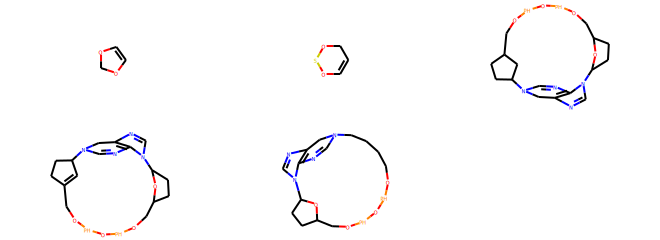

In [36]:
SVG(img)

In [37]:
with open('./chapter3_figure/abc.svg', 'w') as f_handle:
    f_handle.write(img)

In [ ]:


if legends is None:
    img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=(220, 120), useSVG=True)
else:
    img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=(220, 120), useSVG=True, legends=legends)
if file_path:
    with open(file_path, 'w') as f_handle:
        f_handle.write(img.data)
return img